In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
from openpyxl import load_workbook
import glob, os


In [6]:
# setting the path
path = 'c:\\Users\\jonys.arcanjo\\arquivos_sac'
print(path)

c:\Users\jonys.arcanjo\arquivos_sac


In [7]:
# Create function to read and concatenate multiple files into a single.

def concatenate(fx_in, fx_out):
    
    """
    function to read and concatenate multiple files into a single.

        Parameters:
        
           fx_in: Define to path the archives (input)
           fx_out: Define the path where to be the salve to new consolidate archive  (output)

    Returns:
    a consolidated field

    """
        
    
    os.chdir(fx_in) 

    fileList=glob.glob("*.csv")# read only ".csv" type extensions
    past_new = list() #save new data

    for filename in os.listdir(fx_in):#fx_in ==inform input path.
        print(os.path.join(filename))
        df=pd.read_csv(filename,skiprows=2,low_memory=False) # "skiprows=2" start from the header (second row)
        past_new.append(df)    
    concatDf=pd.concat(past_new,axis=0)
 #  concatDf.to_csv(fx_out,index=None) #salve the archive consolidated in the folder selected.
    return concatDf



In [8]:
# execute  function to read and concatenate multiple files into a single

fx_in = "C:\\Users\\jonys.arcanjo\\arquivos_sac" #fx_in: Define to path the archives (input)
fx_out = "C:\\Users\\jonys.arcanjo\\arquivos_sac\ConcatenadoNovo.csv" #fx_out: Define the path where to be the salve to
                                                                      #new consolidate archive  (output)

df_consolidated = concatenate(fx_in, fx_out)


FOLHA_LOG_20190524 (1).csv
FOLHA_LOG_20190524 (10).csv
FOLHA_LOG_20190524 (11).csv
FOLHA_LOG_20190524 (12).csv
FOLHA_LOG_20190524 (13).csv
FOLHA_LOG_20190524 (14).csv
FOLHA_LOG_20190524 (15).csv
FOLHA_LOG_20190524 (16).csv
FOLHA_LOG_20190524 (2).csv
FOLHA_LOG_20190524 (3).csv
FOLHA_LOG_20190524 (4).csv
FOLHA_LOG_20190524 (5).csv
FOLHA_LOG_20190524 (6).csv
FOLHA_LOG_20190524 (7).csv
FOLHA_LOG_20190524 (8).csv
FOLHA_LOG_20190524 (9).csv
FOLHA_LOG_20190524.csv


In [9]:
# Display archive consolidated. 
df_consolidated.head()

,Versão,Indicador,Centro de Custo,Filial,Grupo Cargo,Cargo,Matricula,Fonte,Empresa,Time,Audit Time,Audit User,SignedData - Old,SignedData - New,SignedData - Delta,Audit Action
0,public.V2019_003,FOL_QL,0310142102,3101,04,3100_00001146,3101_00005161,CALC,#,201911,2019.05.24 11:02:42,ADMIN,0.0,1.000000,1.000000,New
1,public.V2019_003,FOL_FERIAS,0310142102,3101,05,3100_00000929,3101_00005641,CALC,#,201902,2019.05.24 11:02:42,ADMIN,0.0,88.634167,88.634167,New
2,public.V2019_003,FOL_PREM_VAR_SOMA_SALARIOS_CLT_APRENDIZ_ESTAGIO,0310142102,3101,05,3100_00000626,3101_00005437,CALC,#,201905,2019.05.24 11:02:42,ADMIN,0.0,1336.540000,1336.540000,New
3,public.V2019_003,FOL_INSS_13_SALARIO,0310142102,3101,05,3100_00000626,3101_00005437,CALC,#,201905,2019.05.24 11:02:42,ADMIN,0.0,31.470000,31.470000,New
4,public.V2019_003,FOL_CONTRIBUICAO_SENAI,0310142102,3101,05,3100_00000626,3101_00005437,CALC,#,201901,2019.05.24 11:02:42,ADMIN,0.0,2.673080,2.673080,New


In [15]:
# Rename header

concatDf = df_consolidated.rename(columns={
                                    'Versão':'Versao',
                                    'Audit Time': 'Periodo_auditoria',
                                    'Centro de Custo':'Centro_de_Custo',
                                   'Grupo Cargo':'Grupo_Cargo',
                                   'Usuário de auditoria':'Usuario_de_auditoria',
                                   'SignedData - Antigo':'Signed_Data_Antigo',
                                   'SignedData - Novo':'Signed_Data_Novo',
                                   'SignedData - Delta':'Signed_Data_Delta',
                                    'Audit Action':'Acao_auditoria'
                                   })
concatDf.head(0)

,Versao,Indicador,Centro_de_Custo,Filial,Grupo_Cargo,Cargo,Matricula,Fonte,Empresa,Time,Periodo_auditoria,Audit User,SignedData - Old,SignedData - New,Signed_Data_Delta,Acao_auditoria


In [17]:
# Display last five rows (select datetime: > 2019.05.22 11:50:15 and < 2019.05.22 13:00:15 )
ped_aud = concatDf[(concatDf['Periodo_auditoria'] > '2019.05.22 11:50:15') & (concatDf['Periodo_auditoria'] < '2019.05.22 13:00:15')]
ped_aud.tail()


,Versao,Indicador,Centro_de_Custo,Filial,Grupo_Cargo,Cargo,Matricula,Fonte,Empresa,Time,Periodo_auditoria,Audit User,SignedData - Old,SignedData - New,Signed_Data_Delta,Acao_auditoria


In [18]:
# Summary of actions realized  - column "Acao_auditoria"
concatDf.groupby(['Acao_auditoria']).size()

Acao_auditoria
Delete          5
Modify     220620
New       1046427
dtype: int64

In [19]:
# Aggregating data - column "Periodo_auditoria"
concatDf.groupby(['Periodo_auditoria']).size()

Periodo_auditoria
2019.05.24 07:58:17      1929
2019.05.24 08:06:19         8
2019.05.24 08:08:56         1
2019.05.24 08:14:30        27
2019.05.24 08:17:26        54
2019.05.24 09:49:36    665033
2019.05.24 10:59:46    103549
2019.05.24 11:02:42    496451
dtype: int64

In [20]:
# Summary of actions by type and datetime
group_excluir = concatDf.groupby(['Periodo_auditoria','Acao_auditoria'],as_index=False)[['Periodo_auditoria','Acao_auditoria']]

group_excluir.size()

Periodo_auditoria    Acao_auditoria
2019.05.24 07:58:17  Delete                 4
                     Modify                 5
                     New                 1920
2019.05.24 08:06:19  New                    8
2019.05.24 08:08:56  Delete                 1
2019.05.24 08:14:30  Modify                27
2019.05.24 08:17:26  Modify                54
2019.05.24 09:49:36  Modify            220534
                     New               444499
2019.05.24 10:59:46  New               103549
2019.05.24 11:02:42  New               496451
dtype: int64

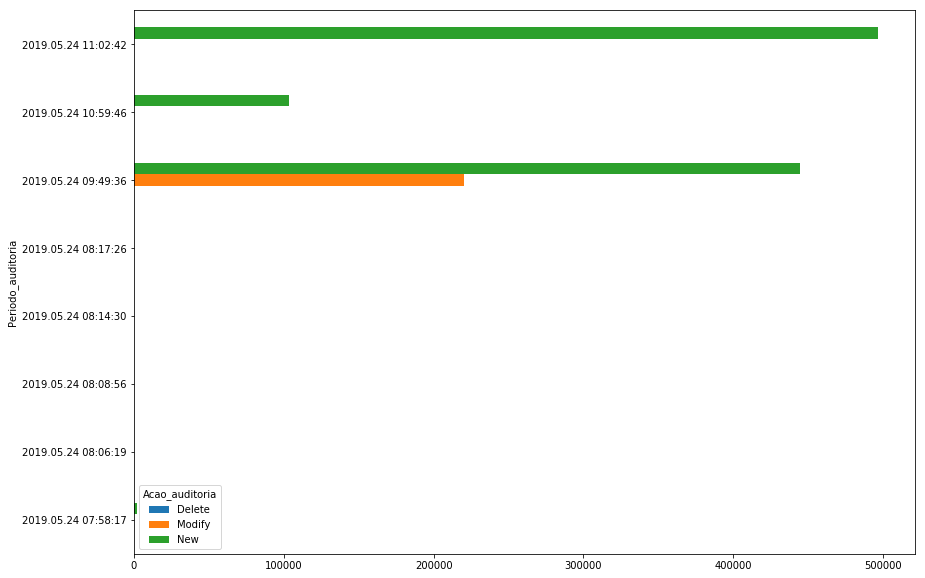

In [22]:
# Graph - total of actions by type and datetime.
df = concatDf.groupby(['Periodo_auditoria','Acao_auditoria']).size().unstack().plot.barh(figsize=(14,10))
